In [336]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline

In [337]:
train = pd.read_csv("C:\\Users\\Vrinda\\Desktop\\projects\\titanic\\TRAIN.csv")
test = pd.read_csv("C:\\Users\\Vrinda\\Desktop\\projects\\titanic\\TEST.csv")

In [338]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [339]:
test.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S


In [340]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percentage = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
    ms = pd.concat([total,percentage], axis=1, keys=['Total', 'Percent'])

    # keeping only those vales as mising which has some missing content
    ms = ms[ms["Percent"]>0]
    fig, ax = plt.subplots(figsize=(5,4))
    
    # Create a bar plot using Matplotlib
    bars = ax.bar(ms.index, ms["Percent"], color="green", alpha=0.8)

    #getting % value on top of the bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=60)
    
    # Set labels and title
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    plt.show()
    
    return ms


----------------TRAIN DATA----------------


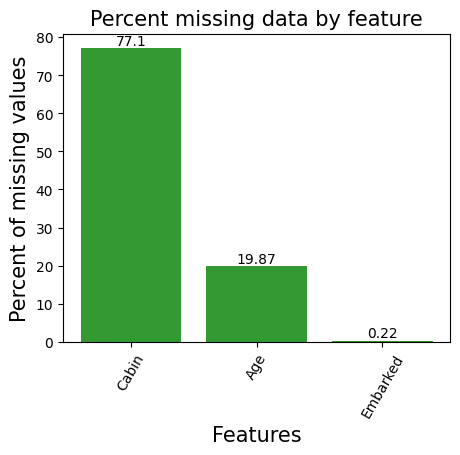

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


In [341]:
print("----------------TRAIN DATA----------------")
missingdata(train)

-----------TEST DATA-----------


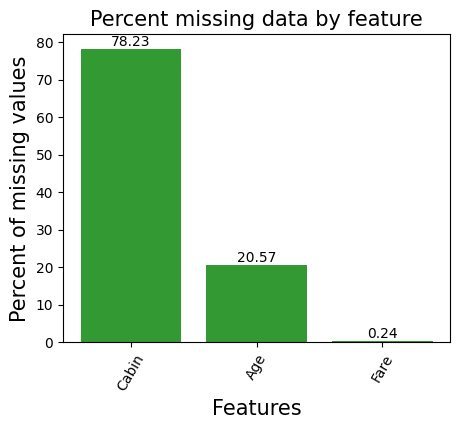

,Total,Percent
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234


In [342]:
print("-----------TEST DATA-----------")
missingdata(test)

In [343]:
# replacing missing data with mode of the present data
train["Embarked"].fillna(train["Embarked"].mode()[0], inplace=True)

In [344]:
# replacing missing data with median of the present data
test["Fare"].fillna(test["Fare"].median(), inplace = True)

In [345]:
# replacing missing data with mode of the present data
train['Age'].fillna(train['Age'].median(), inplace = True)
test['Age'].fillna(test['Age'].median(), inplace = True)


In [346]:
# droping the cabin column becoz the missing % is > 50 or very high in bot data sets 
drop = ['Cabin']
train.drop(drop, axis=1, inplace=True, errors='ignore')
test.drop(drop, axis=1, inplace=True, errors='ignore')


In [347]:
test.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [348]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [349]:
print('checking if now there is any Nan data in train')
print(train.isnull().sum())
print('----'*12)
print('checking if now there is any Nan data in test')
print(test.isnull().sum())

checking if now there is any Nan data in train
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
------------------------------------------------
checking if now there is any Nan data in test
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [350]:
all_data=[train,test]

In [351]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [352]:
for dataset in all_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [353]:
import re
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+). ', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
# Create a new feature Title, containing the titles of passenger names
for dataset in all_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
# Group all non-common titles into one single grouping "Rare"
for dataset in all_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [354]:
#converting the numerical cloumns to catagorical columns by catagorizing them some conditions
#age
for dataset in all_data:
    dataset['Age'] = pd.cut(dataset['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

#fare
for dataset in all_data:
    dataset['Fare'] = pd . cut(dataset['Fare'], bins=[0,8,15,30,150], labels=['low','medium','avegrage','high'])

In [355]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,Adult,1,0,A/5 21171,low,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,high,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,Adult,0,0,STON/O2. 3101282,low,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Adult,1,0,113803,high,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,Adult,0,0,373450,medium,S,1,Mr


In [356]:
#droping the unecessary coloumns
for dataset in all_data:
    drop_column = ['Name','Ticket',]
    dataset.drop(drop_column, axis=1, inplace = True)

In [357]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,892,0,3,male,Adult,0,0,low,Q,1,Mr
1,893,1,3,female,Elder,1,0,low,S,2,Mrs
2,894,0,2,male,Elder,0,0,medium,Q,1,Mr
3,895,0,3,male,Adult,0,0,medium,S,1,Mr
4,896,1,3,female,Adult,1,1,medium,S,3,Mrs


In [358]:
# droping the PassengerId coloun from train data set as not necessary to train the model on basis of PassengerId
col = ['PassengerId']
train.drop(col,axis=1,inplace=True)

In [359]:
train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,male,Adult,1,0,low,S,2,Mr
1,1,1,female,Adult,1,0,high,C,2,Mrs
2,1,3,female,Adult,0,0,low,S,1,Miss
3,1,1,female,Adult,1,0,high,S,2,Mrs
4,0,3,male,Adult,0,0,medium,S,1,Mr


In [360]:
# one hot encoding all the coloumns 

test = pd.get_dummies(test, columns = ["Sex","Age","Title","Embarked","Fare"],prefix=["Sex","Age_type","Title","Em_type","Fare_type"])
train = pd.get_dummies(train, columns = ["Sex","Age","Title","Embarked","Fare"], prefix=["Sex","Age_type","Title","Em_type","Fare_type"])

In [361]:
print(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'FamilySize',
       'Sex_female', 'Sex_male', 'Age_type_Children', 'Age_type_Teenage',
       'Age_type_Adult', 'Age_type_Elder', 'Title_Billiard', 'Title_Brito',
       'Title_Carlo', 'Title_Castello', 'Title_Khalil', 'Title_Master',
       'Title_Messemaeker', 'Title_Miss', 'Title_More', 'Title_Mr',
       'Title_Mrs', 'Title_Ocana', 'Title_Palmquist', 'Title_Planke',
       'Title_Rare', 'Title_Rodriguez', 'Em_type_C', 'Em_type_Q', 'Em_type_S',
       'Fare_type_low', 'Fare_type_medium', 'Fare_type_avegrage',
       'Fare_type_high'],
      dtype='object')


In [362]:
df1 = pd.DataFrame(train)
df2 = pd.DataFrame(test)
a = np.intersect1d(df2.columns, df1.columns)
print(a)

['Age_type_Adult' 'Age_type_Children' 'Age_type_Elder' 'Age_type_Teenage'
 'Em_type_C' 'Em_type_Q' 'Em_type_S' 'FamilySize' 'Fare_type_avegrage'
 'Fare_type_high' 'Fare_type_low' 'Fare_type_medium' 'Parch' 'Pclass'
 'Sex_female' 'Sex_male' 'SibSp' 'Survived' 'Title_Billiard' 'Title_Carlo'
 'Title_Master' 'Title_Messemaeker' 'Title_Miss' 'Title_More' 'Title_Mr'
 'Title_Mrs' 'Title_Planke' 'Title_Rare']


In [363]:
from sklearn.model_selection import train_test_split  # for split the data
from sklearn.metrics import accuracy_score  # for accuracy_score
from sklearn.model_selection import KFold  # for K-fold cross-validation
from sklearn.model_selection import cross_val_score  # score evaluation
from sklearn.model_selection import cross_val_predict  # prediction
from sklearn.metrics import confusion_matrix  # for confusion matrix

"""# Extracting features (independent variables) excluding the "Survived" column
all_features = train.drop("Survived", axis=1)

# Extracting the target variable "Survived"
Targeted_feature = train["Survived"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_features, Targeted_feature, test_size=0.3, random_state=42)

# Displaying the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape"""

X_train = train[a].drop('Survived',axis=1)
X_test = test [a].drop('Survived',axis=1)
y_train = train['Survived']
y_test = test['Survived']

In [369]:
# machine learning
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.metrics import f1_score

model = LogisticRegression()
model.fit(X_train,y_train)
prediction_lr = model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Logistic Regression is',round(accuracy_score(prediction_lr,y_test)*100,2))
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
result_lr = cross_val_score(model,X_train,y_train,cv=10,scoring='accuracy')
print('The cross validated score for Logistic REgression is:',round(result_lr.mean()*100,2))
y_pred = cross_val_predict(model,X_train,y_train,cv=10)

--------------The Accuracy of the model----------------------------
The accuracy of the Logistic Regression is 91.87
The cross validated score for Logistic REgression is: 81.71
